In [1]:
import numpy as np                               #for creating ndarrays for fast and efficient computations
import scipy as sc                               #for scientific computations and purposes
import pandas as pd                              #for tables
pd.options.display.max_rows = 15

import matplotlib as mpl                         #for graphing purposes
import matplotlib.pyplot as plt                  #for making plots
import matplotlib.gridspec as gridspec           #for making grids
from mpl_toolkits.mplot3d import Axes3D          #for making 3d Axes (canvas)


#for interactive notebooks
%matplotlib notebook


In [2]:
Be0_tilde=7.956     #cm−1   the 1st coefficient: describes the energy w.r.t. total angular momentumm number, J
Be1_tilde=-1.648    #cm−1   the 2nd coefficient: describes the energy w.r.t. total angular momentumm number, K
#E_tilde=Be0_tilde*(J*(J+1))+Be1_tildeK**2
kb_tilde=0.69508    #cm-1 Boltzman constant in cm-1, used in this form so that we can work exclusively in wavenumbers
T= 200              #temperature in Kelvin
h = 6.626 * 10 ** -34   # (J * s) Planks constant i have it in wavenumbers somewhere, report that soon
h_bar = h / (2 * np.pi)
j=15


In [3]:
#since we are working with discrete states, the numbers must be integer. no such thing as J=1.5 

#define the numpy array labelled J ranging from 0 to j(default is 15) with the integer numeric type 
J = np.linspace(0,j,j+1).astype(int) #should be 0,1,2,3,...,15

#defines the numpy array labelled K ranging from -j to j with number interget type
K = np.linspace(-j, j, 2 * j + 1).astype(int) #range from -15,14,...,-2,-1,0,1,2,...,14,15

#turns the 1 dimensional J and K numpy arrays into 2dimensional arrays
K, J = np.meshgrid(K, J) #the meshgrid takes two input arrays with varying dimension and length 
#to create two new input arrays of the same dimension based on the input arrays
#for example, if K is rank 1 with length 10 and J is rank 1 with length 5
#the new input arrays will be rank 2 with length 10 and 5
#the purpose of using the meshgrid method is to create a "2d plane" for which we can plot with
#you can think of K and J to be the x and y plane where each index has two associated numbers, J and K, 
#at a given point. Just print the arrays out to see what happens to get an intuitive feel

#mathematically, this is equivalent to taking the vector spaces J and K to create a new space J x K
# rank J x K = rank J + rank K etc etc

#These two methods insures that the data number type is integer
K = K.astype(int)
J = J.astype(int)

In [4]:
c = []
for x in range(j+1):
    row = [((2.0*x+1.0)*np.exp(-((Be0_tilde*(x*(x+1))+Be1_tilde*j**2)/(kb_tilde*T))))]
    for y in range(2*j):
        if (y == j - 1):
            row.append(((2.0*x+1.0)*np.exp(-((Be0_tilde*(x*(x+1))+Be1_tilde*(y-j+1)**2)/(kb_tilde*T)))))
        else:
            row.append(((2.0*x+1.0)*np.exp(-((Be0_tilde*(x*(x+1))+Be1_tilde*(y-j+1)**2)/(kb_tilde*T)))))
    c.append(row)
C=np.array(c)

#created this complex method creating the distribution because it allows you to consider degeneracy
#in the future I may break this into two different calculations to just calculate the degeneracy
#the if and else are the same because I realize the degenracy are the same
#in the brackets containig (2.0*x+1.0) is where the degenracy of the states can be modified if needed
#in the future, break this into G and E, where G represents the degeneracy of the vector j,k in the space J,K
#E is the energy of the vector j,k 

In [5]:
D = np.zeros_like(K)

for x in range(2*j+1):
    for y in np.nditer(J[:,x], op_flags=['readwrite']):
        if y >= abs(x-j):
            D[y,x] = 1
        else:
            D[y,x]=0
#this creates the allowed states, K is dependent on J. K cannot exceed J    


C = C * D
Z=np.sum(C) #this is the partition function of all the vectors j,k
C=C/Z # divide the c by the partition function Z to normalized the distribution 

In [6]:
E = h*(Be0_tilde * (J *( J + 1)) + Be1_tilde * K**2) * D

<IPython.core.display.Javascript object>


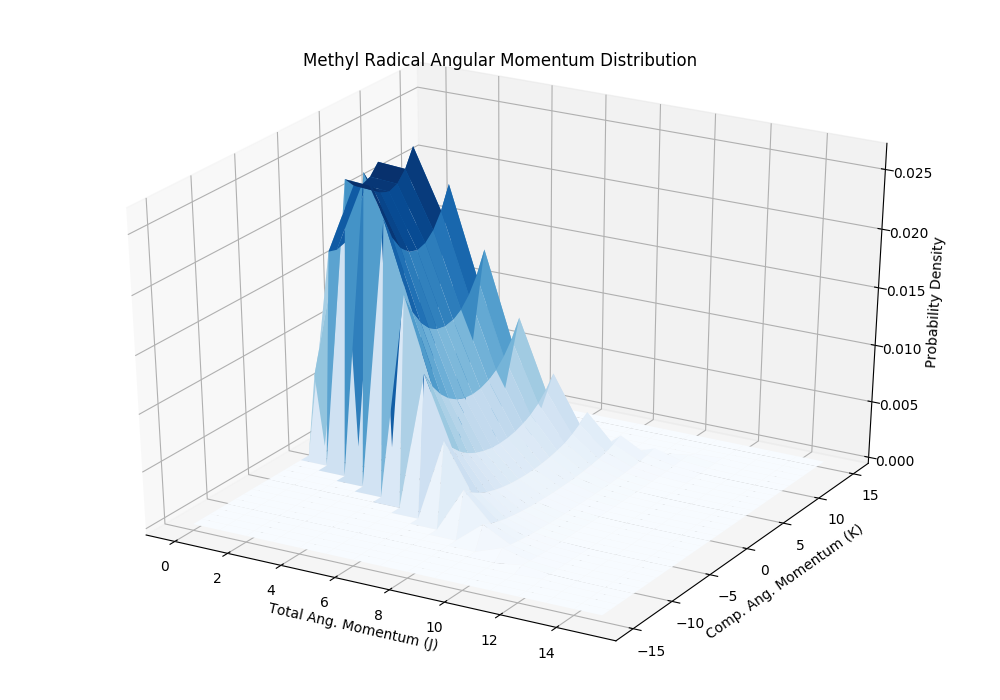

In [7]:
fig_distribution = plt.figure()
fig_distribution.set_size_inches(10,7)

ax_dist_1 = fig_distribution.add_subplot(111, projection='3d') #makes the axis 3d
ax_dist_1.plot_surface(J, K, C, rstride=1, cstride=1, cmap='Blues') #plots vector C wrt to vectors j,k
ax_dist_1.set_title('Methyl Radical Angular Momentum Distribution') #title
ax_dist_1.set_xlabel('Total Ang. Momentum (J)') # label the x axis
ax_dist_1.set_ylabel('Comp. Ang. Momentum (K)') # label the y axis
ax_dist_1.set_zlabel('Probability Density')     # label the z axis

#ax_dist_2 = fig_distribution.add_subplot(312, projection='3d')
#ax_dist_2.plot_wireframe(J, K, C, rstride=1, cstride=0)
#ax_dist_2.set_title('Methyl Radical Angular Momentum Distribution')
#ax_dist_2.set_xlabel('Total Ang. Momentum (J)')
#ax_dist_2.set_ylabel('Comp. Ang. Momentum (K)')
#ax_dist_2.set_zlabel('Probability Density')

#ax_dist_3 = fig_distribution.add_subplot(313, projection='3d')
#ax_dist_3.plot_wireframe(J, K, C, rstride=0, cstride=1)
#ax_dist_3.set_title('Methyl Radical Angular Momentum Distribution')
#ax_dist_3.set_xlabel('Total Ang. Momentum (J)')
#ax_dist_3.set_ylabel('Comp. Ang. Momentum (K)')
#ax_dist_3.set_zlabel('Probability Density')
fig_distribution.tight_layout()
fig_distribution.savefig('Methyl-Radical-Angular-Momentum-Distribution-3subplots.svg',format='svg') #saves the figure
fig_distribution.show()

<IPython.core.display.Javascript object>


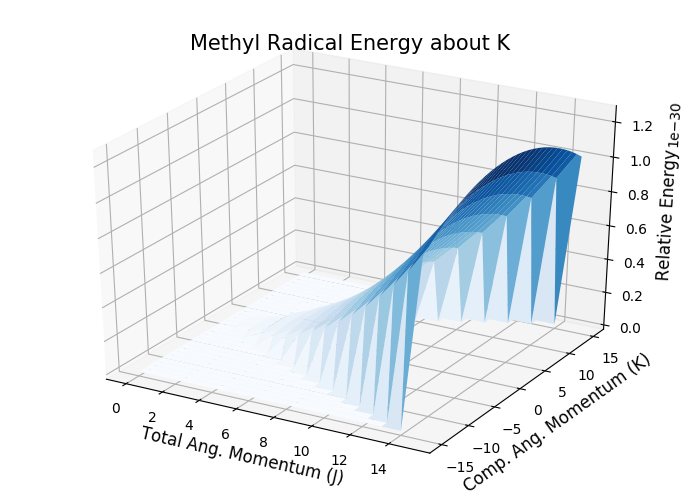

In [8]:
fig_energy = plt.figure()
fig_energy.set_size_inches(7,5)

ax_energy_1 = fig_energy.add_subplot(111, projection='3d')
ax_energy_1.plot_surface(J, K, E, rstride=1, cstride=1, cmap='Blues')
#strides just means how many lines to make when creating the plots
#cmap is the color maps. just googel matplotlib color maps and plot different cmaps to see how it works
ax_energy_1.set_title('Methyl Radical Energy about K', size = 15)
ax_energy_1.set_xlabel('Total Ang. Momentum (J)', size = 12)
ax_energy_1.set_ylabel('Comp. Ang. Momentum (K)', size = 12)
ax_energy_1.set_zlabel('Relative Energy', size = 12)

#ax_energy_2 = fig_energy.add_subplot(312, projection='3d')
#ax_energy_2.plot_wireframe(J, K, E, rstride=1, cstride=0)
#ax_energy_2.set_title('Methyl Radical Energy about K')
#ax_energy_2.set_xlabel('Total Ang. Momentum (J)')
#ax_energy_2.set_ylabel('Comp. Ang. Momentum (K)')
#ax_energy_2.set_zlabel('Relative Energy', )

#ax_energy_2 = fig_energy.add_subplot(313, projection='3d')
#ax_energy_2.plot_wireframe(J, K, E, rstride=0, cstride=1)
#ax_energy_2.set_title('Methyl Radical Energy about K')
#ax_energy_2.set_xlabel('Total Ang. Momentum (J)')
#ax_energy_2.set_ylabel('Comp. Ang. Momentum (K)')
#ax_energy_2.set_zlabel('Relative Energy')
fig_energy.tight_layout()
fig_energy.savefig('Methyl-Radical-Energy-Level-Distribution.svg',format='svg')
fig_energy.show()

In [9]:
from random import randint
colors = []

for i in range(4):
    colors.append('%06X' % randint(0, 0xFFFFFF))
    
#anybody know how to make the wireframes different colored to make viewing the different states easy

In [10]:
fig_energy.savefig('Methyl-Radical-Energy-Level-Distribution.svg',format='svg')